Predict the salary if the employee using the features provided in the data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/Salaries.csv')

In [3]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [6]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# Dataframe Description

Data of an employee

Salary is our target variable

In [8]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

Salary has a continous data and it is int64 type

# Nominal Data

In [9]:
df_visualization_nominal = df[['sex']].copy()

In [10]:
df_visualization_nominal.columns

Index(['sex'], dtype='object')

# Visualization of the Data

In [11]:
import seaborn as sns

Male      358
Female     39
Name: sex, dtype: int64


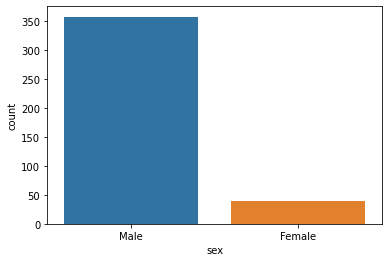

In [12]:
ax = sns.countplot(x="sex", data=df_visualization_nominal)
print(df_visualization_nominal["sex"].value_counts())

From the above observation the total number of male is 358 and female is 39

# Making Datafame of Ordinal Data

In [13]:
df_visualization_ordinal = df[['rank', 'discipline']].copy()

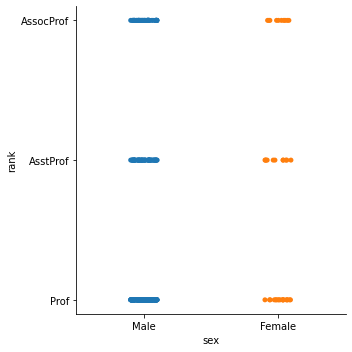

In [14]:
sns.catplot(x="sex",y="rank", data=df)

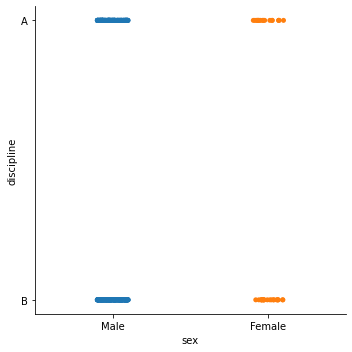

In [15]:
sns.catplot(x="sex",y="discipline", data=df)

# Checking the distribution of continous type columns

In [16]:
df_visualization_continous=df[['yrs.since.phd','yrs.service','salary']].copy()

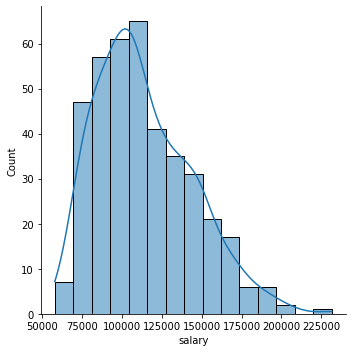

In [17]:
import seaborn as sns
sns.displot(df_visualization_continous['salary'], kde=True)

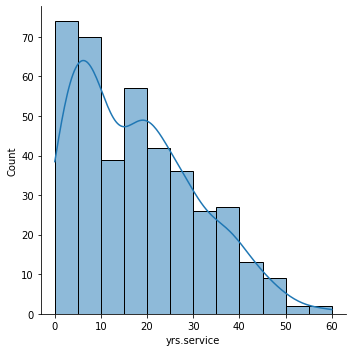

In [18]:
sns.displot(df_visualization_continous['yrs.service'], kde=True)

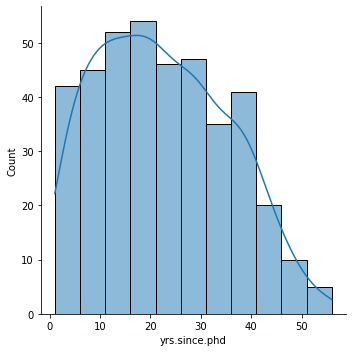

In [19]:
sns.displot(df_visualization_continous['yrs.since.phd'], kde=True)

# Encoding Of Dataframe

In [20]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [21]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [22]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


Describe the dataser

In [23]:
# only continous columns
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

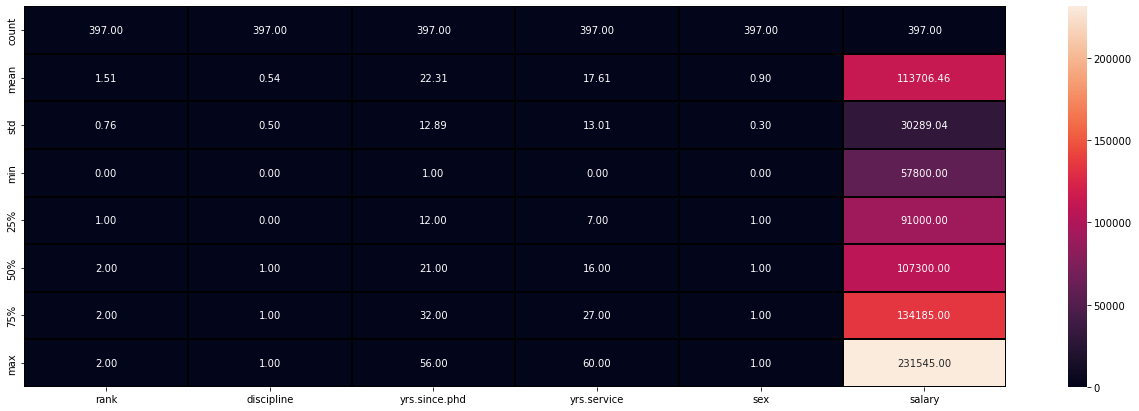

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Correlation of the columns with traget columns

In [25]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

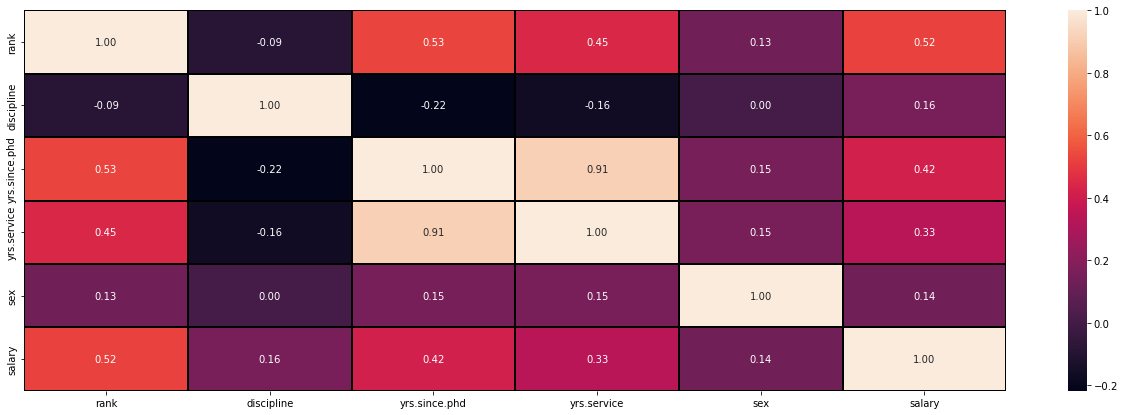

In [26]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Checking the columns which are positively and negitavely corelated with the target column

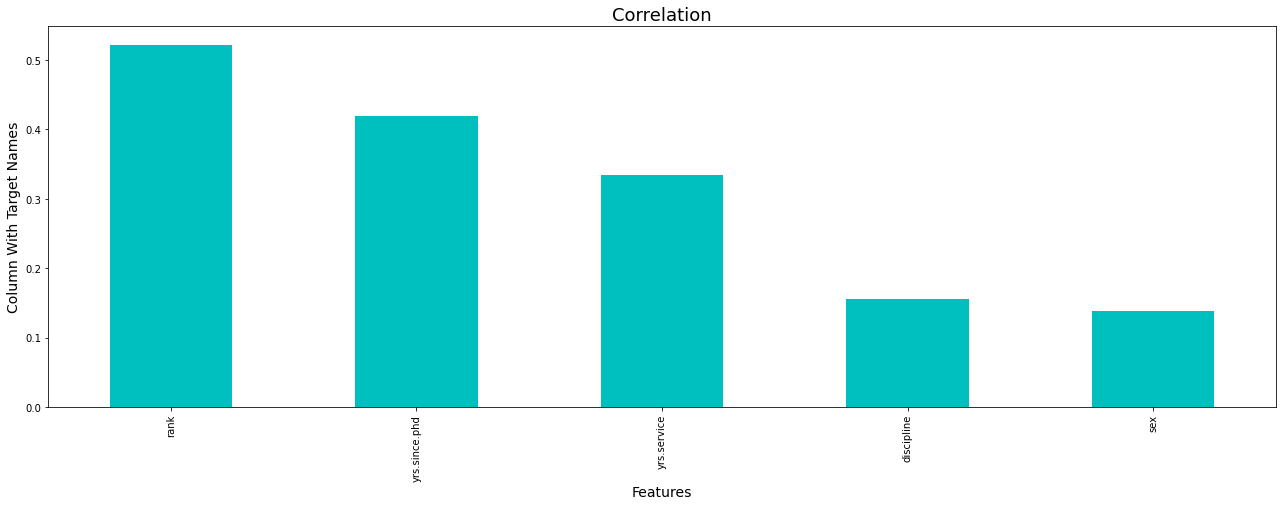

In [27]:
plt.figure(figsize=(22,7))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column With Target Names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [28]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Keeping -0.5 to +0.5 as the range for skewness, here are column which does dont lies in the range

rank - categorical, 
yrs.service - continous, 
sex - categorical, 
salary - Target variable

yrs.service is continous and is not in skewness range so we have to remove its skewness

In [29]:
df["yrs.service"] = np.sqrt(df["yrs.service"])

In [30]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service     -0.160353
sex             -2.709958
salary           0.714568
dtype: float64

yrs.service is continous is now under the skewness range (-0.5 to +0.5)

# Outliers Check

In [31]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service      float64
sex              float64
salary             int64
dtype: object

Checking the outliers on the int and float type of the columns

<AxesSubplot:>

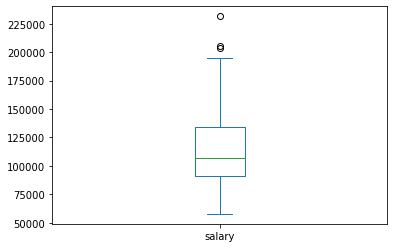

In [32]:
df["salary"].plot.box()

<AxesSubplot:>

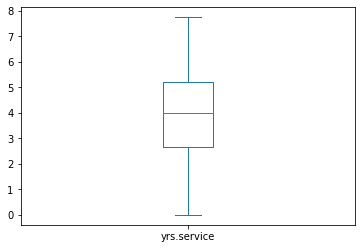

In [33]:
df["yrs.service"].plot.box()

<AxesSubplot:>

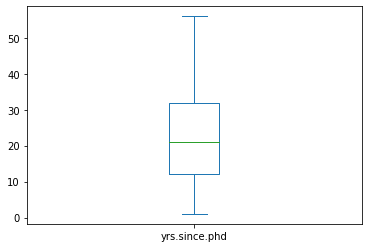

In [34]:
df["yrs.since.phd"].plot.box()

Since other columns are categorial type we cannot consider its datapoint as outliers

In [35]:
df.shape

(397, 6)

# Saperate the columns into features and target:

In [36]:
features=df.drop("salary",axis=1)
target=df["salary"]

Scaling the data using Min- Max Scaler

In [37]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, training accuracy is :-  {r2_score(target_train,pred_train)}")
    print(f"At random state {i}, testing accuracy is :-  {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, training accuracy is :-  0.3492671339092651
At random state 0, testing accuracy is :-  0.4086569066174661


At random state 1, training accuracy is :-  0.356677320021092
At random state 1, testing accuracy is :-  0.37773310058623877


At random state 2, training accuracy is :-  0.36087460837100704
At random state 2, testing accuracy is :-  0.37271231708247066


At random state 3, training accuracy is :-  0.3830963419688238
At random state 3, testing accuracy is :-  0.2866953079295631


At random state 4, training accuracy is :-  0.37753632492101763
At random state 4, testing accuracy is :-  0.2847547517906437


At random state 5, training accuracy is :-  0.3760085137958573
At random state 5, testing accuracy is :-  0.29385038262674534


At random state 6, training accuracy is :-  0.3504284609080248
At random state 6, testing accuracy is :-  0.41258142561308564


At random state 7, training accuracy is :-  0.3399495427464555
At random state 7, testing accuracy is :-  

At random state 64, testing accuracy is :-  0.5047389999016785


At random state 65, training accuracy is :-  0.39212759825630894
At random state 65, testing accuracy is :-  0.24358148483599418


At random state 66, training accuracy is :-  0.36464768744476206
At random state 66, testing accuracy is :-  0.3452564126717481


At random state 67, training accuracy is :-  0.3407251750786908
At random state 67, testing accuracy is :-  0.430987673803504


At random state 68, training accuracy is :-  0.4126787072468381
At random state 68, testing accuracy is :-  0.14739039016160782


At random state 69, training accuracy is :-  0.3474120750488
At random state 69, testing accuracy is :-  0.39608473741621875


At random state 70, training accuracy is :-  0.3941968767611087
At random state 70, testing accuracy is :-  0.11653462809935267


At random state 71, training accuracy is :-  0.36815238045221177
At random state 71, testing accuracy is :-  0.325094600663266


At random state 72, training a

In [40]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=.20,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test, pred)

    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state ",maxRS)

Best Accuracy is  0.5093697667934673 on Random_state  150


In [41]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=maxRS)

In [42]:
# train the model
lr.fit(features_train,target_train)

LinearRegression()

In [43]:
prod_test=lr.predict(features_test)

In [44]:
print(r2_score(target_test,pred_test))

-0.3663473116222413


# Cross Validation of model

In [45]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fole {j} the cv score is {cv_mean} and accuracy for training is {Train_accuracy}  and accuracy for testing is {Test_accuracy}")
    print("\n")

At cross fole 2 the cv score is 0.29238525033244034 and accuracy for training is -0.4390893623138643  and accuracy for testing is -0.3663473116222413


At cross fole 3 the cv score is 0.3005764825951393 and accuracy for training is -0.4390893623138643  and accuracy for testing is -0.3663473116222413


At cross fole 4 the cv score is 0.3120719375427048 and accuracy for training is -0.4390893623138643  and accuracy for testing is -0.3663473116222413


At cross fole 5 the cv score is 0.29817444360863465 and accuracy for training is -0.4390893623138643  and accuracy for testing is -0.3663473116222413


At cross fole 6 the cv score is 0.32160482154449377 and accuracy for training is -0.4390893623138643  and accuracy for testing is -0.3663473116222413


At cross fole 7 the cv score is 0.3132584641958785 and accuracy for training is -0.4390893623138643  and accuracy for testing is -0.3663473116222413


At cross fole 8 the cv score is 0.3253064949843779 and accuracy for training is -0.43908936

Since the number of folds does not have much impact on the accuracy of cv_score so cv=5 is selected

Here we handle the problem of overfitting and underfitting by checking the training and testing score

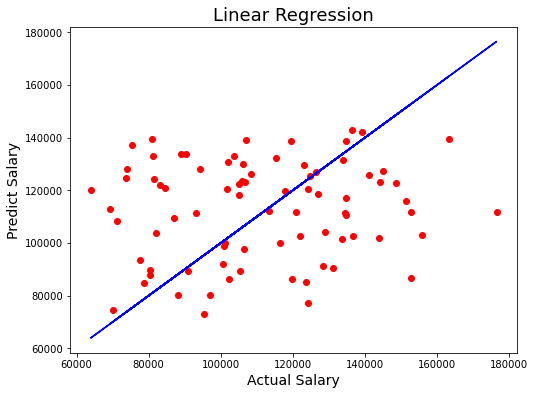

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Salary',fontsize=14)
plt.ylabel('Predict Salary',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

Best fit line is covering most of the datapoints which shows good fit of our model

Ensembls Technique

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
perameters = {'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,perameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [48]:
rf = RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print("R2 Score:",rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print("Cross Val Score:",rfs*100)

R2 Score: 54.567557440028224
Cross Val Score: 54.567557440028224


In [49]:
import pickle
filename = 'salary.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [50]:
loaded_model = pickle.load(open('salary.pkl','rb'))
result = loaded_model.score(features_test,target_test)
print(result*100)

54.567557440028224


In [51]:
conclusion = pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Predicted,99768.04,84087.01,96998.52,128302.95,132619.89,149088.605,144698.92,131412.34,122763.21,119414.19,...,82521.63,152461.45,109149.84,88971.755,114304.49,152100.885,96110.8,81663.22,79391.4,95021.88
Original,99768.04,84087.01,96998.52,128302.95,132619.89,149088.605,144698.92,131412.34,122763.21,119414.19,...,82521.63,152461.45,109149.84,88971.755,114304.49,152100.885,96110.8,81663.22,79391.4,95021.88
